In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
iris = datasets.load_iris()

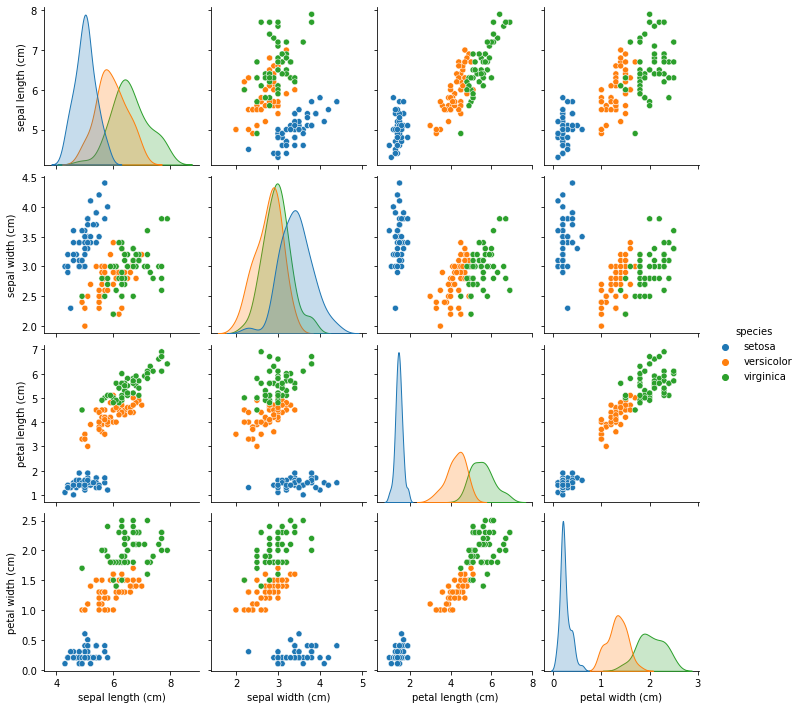

In [2]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])

sns.pairplot(df, hue='species')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123456)

In [5]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.96
Mean accuracy score: 0.933


<AxesSubplot:>

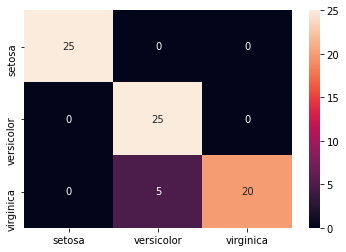

In [6]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

# Random forest regression

波士顿住房数据集包括马萨诸塞州波士顿地区的人口普查住房价格数据，以及一系列量化本地区域各种属性（例如犯罪率，空气污染和学校师生比率）的值。我们面临的问题是，我们是否可以使用这些数据来准确预测房价中位数。该数据集的一个警告是房价中位数被截断为50,000美元，这表明该数据区域中可能存在相当大的噪音。您可能要从集合中除去房价中位数为50,000美元的所有数据，然后看回归值是否有所改善。

对于随机森林，这并不是绝对必要的，但可以使我们稍后执行更有意义的主成分分析。使用预处理模块的StandardScaler类，在sklearn中执行此转换非常简单。这次，我们将使用80/20的数据分割。您可以对房价进行分级抽样，但是我们现在不必担心

In [7]:
boston = datasets.load_boston()

features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [19]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cpts = pd.DataFrame(pca.transform(X_train))
x_axis = np.arange(1, pca.n_components_+1)
pca_scaled = PCA()
pca_scaled.fit(X_train_scaled)
cpts_scaled = pd.DataFrame(pca.transform(X_train_scaled))

# matplotlib boilerplate goes here

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, oob_score=True, random_state=0)

In [14]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(X_train)
predicted_test = rf.predict(X_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.841
Test data R-2 score: 0.883
Test data Spearman correlation: 0.903
Test data Pearson correlation: 0.94
